# **PRIMER PARCIAL**

 <h2>EJERCICIO R1 -> DATASET 67
 <h3>
  NOMBRE: Delgadillo LLanos Juan Sebastian <br>
  CARRERA: Ingenieria de Sistemas ( oyente )<BR>  
  
  * [Enlace al git hub](https://github.com/sebastianDLL/SIS420_IA/tree/main)
  
  * [Enlace al Colab](https://colab.research.google.com/drive/10sliaK_CIZwan601AqtfkvzRxyAdEvXO?usp=sharing)
 <h3>

# **Regresion Polinomica**

Conjunto de datos con precios de casas en INDIA

Los datos que se conocen son: POSTED_BY	UNDER_CONSTRUCTION	RERA	BHK_NO.	BHK_OR_RK	SQUARE_FT	READY_TO_MOVE	RESALE	ADDRESS	LONGITUDE	LATITUDE	TARGET

y = (PRICE_IN_LACS) --> PRECIO DE LA CASA EN LACS 100.000u

# Conectamos a nuestro Drive

In [91]:
from google.colab import drive
drive.mount("/content/gdrive")

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [114]:
# utilizado para manejos de directorios y rutas
import os

# Computacion vectorial y cientifica para python
import numpy as np

# Librerias para graficación (trazado de gráficos)
from matplotlib import pyplot
from mpl_toolkits.mplot3d import Axes3D  # Necesario para graficar superficies 3D
from sklearn.model_selection import train_test_split
import pandas as pd
# llama a matplotlib a embeber graficas dentro de los cuadernillos
%matplotlib inline

# **PREPROCESAMIENTO DEL DATASET**

In [ ]:
#Haciendo uso de la libreria pandas para leer el dataset.
dataset = pd.read_csv('/content/gdrive/MyDrive/SIS420/PrimerParcial/train.csv', delimiter=';')

#Imprimimos en una tabla el dataset.
dataset

In [130]:
# ELIMINAMOS COLUMNAS QUE NO NOS SERVIRAN

# Lista de nombres de columnas que deseas eliminar
columnas_a_eliminar = ['POSTED_BY', 'ADDRESS']
# Elimina las columnas especificadas
dataset = dataset.drop(columnas_a_eliminar, axis=1)

#CONVERTIMOS VALORES LITERALES A VALORES NUMERICOS

# Definir un diccionario de mapeo de etiquetas literales a enteros
label_mapping = {'BHK': 1, 'RK': 2}
# Mapear las etiquetas literales a enteros
dataset['BHK_OR_RK'] = dataset['BHK_OR_RK'].map(label_mapping)

#CONVERTIMOS A TIPO FLOAT LAS COLUMNAS DE TIPO OBJECT

# Convertir las columnas a tipos de datos numéricos apropiados
# Remover los puntos de la columna 'SQUARE_FT' 'LONGITUDE' y 'LATITUDE' y luego convertir a float
dataset['SQUARE_FT'] = dataset['SQUARE_FT'].str.replace('.', '').astype(float)
dataset['LONGITUDE'] = dataset['LONGITUDE'].str.replace('.', '').astype(float)
dataset['LATITUDE'] = dataset['LATITUDE'].str.replace('.', '').astype(float)

# Imprimir el DataFrame después de la manipulación
# Verificar que no haya datos faltantes
dataset.info()
print('\nDATOS VACIOS')
print(pd.isnull(dataset).sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29451 entries, 0 to 29450
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   UNDER_CONSTRUCTION     29451 non-null  int64  
 1   RERA                   29451 non-null  int64  
 2   BHK_NO.                29451 non-null  int64  
 3   BHK_OR_RK              29451 non-null  int64  
 4   SQUARE_FT              29451 non-null  float64
 5   READY_TO_MOVE          29451 non-null  int64  
 6   RESALE                 29451 non-null  int64  
 7   LONGITUDE              29451 non-null  float64
 8   LATITUDE               29451 non-null  float64
 9   TARGET(PRICE_IN_LACS)  29451 non-null  float64
dtypes: float64(4), int64(6)
memory usage: 2.2 MB

DATOS VACIOS
UNDER_CONSTRUCTION       0
RERA                     0
BHK_NO.                  0
BHK_OR_RK                0
SQUARE_FT                0
READY_TO_MOVE            0
RESALE                   0
LONGITUDE     

In [ ]:
# Separar el conjunto de datos en conjuntos de entrenamiento 80% y prueba 20%
train_dataset, test_dataset = train_test_split(dataset, test_size=0.2, random_state=42)

# Separar las características (X) y las etiquetas (y) para el conjunto de prueba
X_test = test_dataset.drop(['TARGET(PRICE_IN_LACS)'], axis=1)
y_test = test_dataset['TARGET(PRICE_IN_LACS)']

# Separar las características (X) y las etiquetas (y) para el conjunto de entrenamiento
X_train = train_dataset.drop(['TARGET(PRICE_IN_LACS)'], axis=1)
y_train = train_dataset['TARGET(PRICE_IN_LACS)']

# Calcular el número de ejemplos de entrenamiento
m_train = len(y_train)

# Imprimir las características y las etiquetas de entrenamiento
print("Características de entrenamiento (X_train):")
print(X_train.head())  # Imprimir las primeras filas del conjunto de características de entrenamiento
print("\nEtiquetas de entrenamiento (y_train):")
print(y_train.head())  # Imprimir las primeras filas del conjunto de etiquetas de entrenamiento

# Imprimir la cantidad de ejemplos de entrenamiento y prueba
print("\nEl 80% de ejemplos para entrenamiento son la cantidad de: {:.0f} ejemplos".format(len(train_dataset)))
print("El 20% de ejemplos para pruebas son la cantidad de: {:.0f} ejemplos".format(len(test_dataset)))


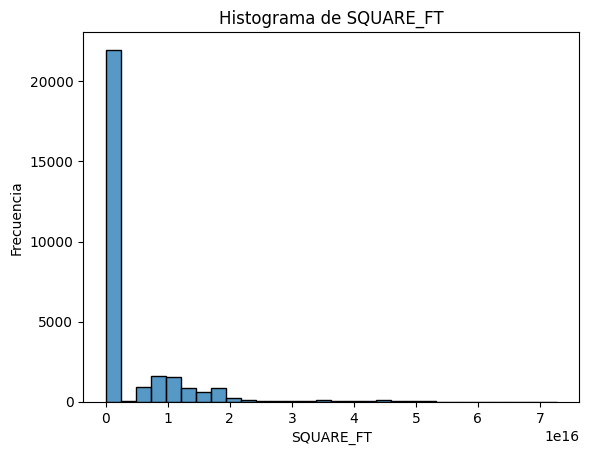

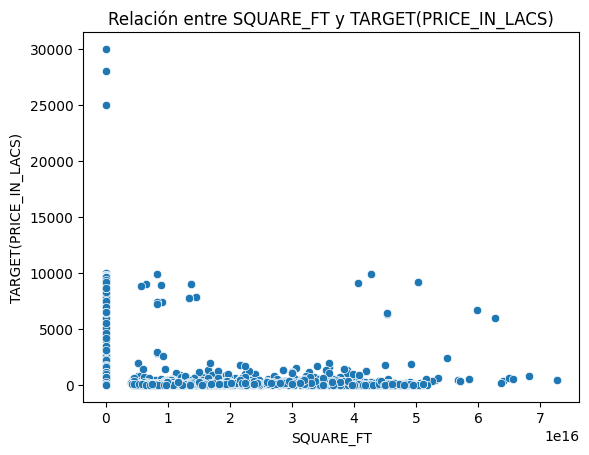

In [146]:
import seaborn as sns
import matplotlib.pyplot as plt

# Histograma de la característica 'SQUARE_FT'
sns.histplot(dataset['SQUARE_FT'], bins=30)
plt.xlabel('SQUARE_FT')
plt.ylabel('Frecuencia')
plt.title('Histograma de SQUARE_FT')
plt.show()

# Gráfico de dispersión entre 'SQUARE_FT' y 'TARGET(PRICE_IN_LACS)'
sns.scatterplot(data=dataset, x='SQUARE_FT', y='TARGET(PRICE_IN_LACS)')
plt.xlabel('SQUARE_FT')
plt.ylabel('TARGET(PRICE_IN_LACS)')
plt.title('Relación entre SQUARE_FT y TARGET(PRICE_IN_LACS)')
plt.show()


In [132]:
def  featureNormalize(X):
    X_norm = X.copy()
    mu = np.zeros(X.shape[1])
    sigma = np.zeros(X.shape[1])

    mu = np.mean(X, axis = 0)
    sigma = np.std(X, axis = 0)
    X_norm = (X - mu) / sigma

    return X_norm, mu, sigma

In [133]:
# llama featureNormalize con los datos cargados
X_norm, mu, sigma = featureNormalize(X_train)

# Añade el termino de interseccion a X
# (Columna de unos para X0)
X_train_ready = np.concatenate([np.ones((m_train, 1)), X_norm], axis=1)
print(X_train_ready)

[[ 1.          2.13646391 -0.6829721  ...  0.27816062 -0.53732088
  -0.39516207]
 [ 1.         -0.46806314 -0.6829721  ...  0.27816062 -0.53732088
  -0.3951621 ]
 [ 1.          2.13646391  1.46418865 ...  0.27816062  1.82209552
  -0.39516209]
 ...
 [ 1.          2.13646391  1.46418865 ...  0.27816062  1.19210399
  -0.39516207]
 [ 1.         -0.46806314 -0.6829721  ...  0.27816062 -0.53732088
  -0.39516207]
 [ 1.          2.13646391 -0.6829721  ...  0.27816062 -0.53732088
  -0.39516207]]


In [134]:
def computeCostMulti(X, y, theta, lambda_):
    m = y.shape[0]  # numero de ejemplos de entrenamiento
    J = 0
    h = np.dot(X, theta)
    J = (1/(2 * m)) * np.sum(np.square(np.dot(X, theta) - y)) + (lambda_ / (2 * m)) * np.sum(np.square(theta))   # <-- Término de regularización
    return J

In [135]:
def gradientDescentMulti(X, y, theta, alpha, num_iters, lambda_):
    # alfa => coeficiente de aprendizaje
    # Inicializa algunos valores
    m = y.shape[0]  # numero de ejemplos de entrenamiento
    theta = theta.copy() # realiza una copia de theta, el cual será actualizada por el descenso por el gradiente
    J_history = []
    for i in range(num_iters):
        theta = theta - (alpha / m) * (np.dot(X.T, np.dot(X, theta) - y) + lambda_ * theta)
        J_history.append(computeCostMulti(X, y, theta, lambda_))
    return theta, J_history

In [122]:
X_train_ready.shape

(23560, 10)

con un costo de: 188375.08306921902 
Theta calculado por el descenso de gradiente: [ 143.45612605   -5.58423857   11.66384402   76.45189033   -0.30724414
   -0.45233438    5.58423857 -143.62552606  -18.03384468   -0.75436368]


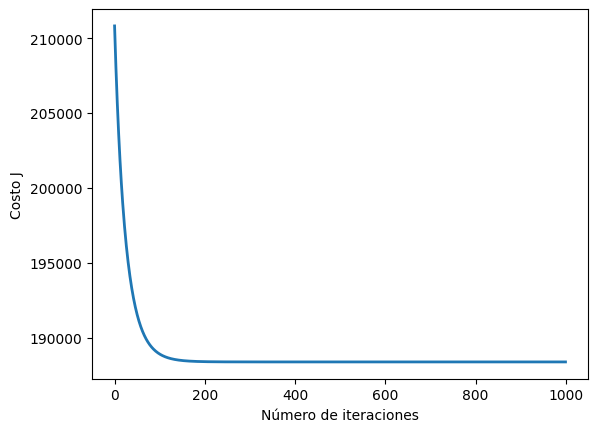

In [136]:
# Elegir algún valor para alpha (probar varias alternativas)
alpha = 0.02  # También se puede probar con otros valores como 0.1, 0.001
num_iters = 1000  # <-- 1seg
_lambda = 0.01

# Inicializa theta con la longitud correcta
theta = np.zeros(X_train_ready.shape[1])  # La longitud de theta debe ser igual al número de características más uno

# Ejecuta el descenso de gradiente
theta, J_history = gradientDescentMulti(X_train_ready, y_train, theta, alpha, num_iters, _lambda)

# Grafica la convergencia del costo
pyplot.plot(np.arange(len(J_history)), J_history, lw=2)
pyplot.xlabel('Número de iteraciones')
pyplot.ylabel('Costo J')
#mostramos el ultimo costo, este seria el mejor costo
print(f"con un costo de: { J_history[-1]} ")

# Muestra los resultados del descenso de gradiente
print('Theta calculado por el descenso de gradiente: {:s}'.format(str(theta)))


In [140]:
#print(X_test)
# Normalizar los datos
#X_test_norm = (X_test - mu) / sigma

# Agregar una columna de unos para el término de intercepción
m_test = len(X_test)
X_test_ready = np.concatenate([np.ones((m_test, 1)), X_test], axis=1)
X_test_ready

array([[1.0000000e+00, 0.0000000e+00, 0.0000000e+00, ..., 1.0000000e+00,
        2.2483471e+16, 8.8417711e+07],
       [1.0000000e+00, 0.0000000e+00, 0.0000000e+00, ..., 1.0000000e+00,
        2.8456809e+16, 7.7099182e+07],
       [1.0000000e+00, 0.0000000e+00, 0.0000000e+00, ..., 1.0000000e+00,
        2.8636760e+06, 7.7363150e+06],
       ...,
       [1.0000000e+00, 0.0000000e+00, 0.0000000e+00, ..., 1.0000000e+00,
        1.3709147e+07, 7.5806085e+07],
       [1.0000000e+00, 0.0000000e+00, 0.0000000e+00, ..., 1.0000000e+00,
        1.9121226e+07, 7.2880241e+07],
       [1.0000000e+00, 0.0000000e+00, 0.0000000e+00, ..., 1.0000000e+00,
        2.2459169e+07, 8.8364505e+15]])

In [144]:
# Realizar la predicción utilizando el modelo entrenado y X_test_ready
prediccion_test = np.dot(X_test_ready, theta)

# Comparar la predicción con y_test
precision = np.mean((prediccion_test - y_test) ** 2)

print("Y_test:")
print(y_test)

print("Precisión:")
print(precision)


Y_test:
21992     34.9
29060    170.0
6778      35.0
4730      55.0
28825     20.3
         ...  
16895     50.0
795      270.0
19099     85.0
21782    100.0
7255      22.0
Name: TARGET(PRICE_IN_LACS), Length: 5891, dtype: float64
Precisión:
4.70627593153326e+34
